# --> Importations

In [12]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --> Importation et normalisation des données en entrée

In [13]:
#Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist                            #Librairie dataset
(images, targets), (_, _) = fashion_mnist.load_data() #On ignore les informations avec _
images = images[:10000]                                                    #On ne prend pas tout le dataset pour aller plus vite
targets = targets[:10000]

#Normalisation des valeurs de 0 a 255 => 0 a 1
from sklearn.preprocessing import StandardScaler
print("Avant normalisation")
print("Moyenne valeur pixel: ", images.mean())   #On voit que ces deux valeurs sont beaucoup
print("Ecart type valeur pixel: ", images.std()) #trop eleves, il faut donc normaliser
images = images.reshape(-1, 784)                 #On flatten les images en entree 2D => 1D
images = images.astype(float)                    #On definit les valeurs comme etant des float
scaler = StandardScaler()                        #StandardScaler est une fonction de normalisation qui diminue l'ecart type des valeurs
images = scaler.fit_transform(images)
print("Apres normalisation")
print("Moyenne valeur pixel: ", images.mean())   #On voit que ces deux valeurs ont bien
print("Ecart type valeur pixel: ", images.std()) #change et que la normalisation a eu lieu

#Normalisation des valeurs pour images_test
images_test = images_test.reshape(-1, 784)
images_test = images_test.astype(float)
images_test = scaler.fit_transform(images)

#Affichage de nos shape
print("\nShape des images : ", images.shape)
print("Shape de notre liste de classification : ", targets.shape)
#print(images[0]) #Tableau 2D de niveau de gris (0 a 255)
#print(targets[0]) #Numero de la classe

Avant normalisation
Moyenne valeur pixel:  73.00877385204082
Ecart type valeur pixel:  90.2745808471392
Apres normalisation
Moyenne valeur pixel:  -1.0476880134421886e-18
Ecart type valeur pixel:  1.0000000000000007

Shape des images :  (10000, 784)
Shape de notre liste de classification :  (10000,)


# --> Creation du validation set

In [14]:
#Le validation set doit etre different du train set. Le but est de verifier la capacite d'extrapolation 
#pendant l'entrainement du reseau de neuronne. Le model sera jamais entraine sur ce validation set
#Grace a cela, on s'assure que la generalisation fonctionne et que le reseau n'apprend pas par coeur le train set
#Ce probleme est appelé l'overfitting. Pour reperer l'overfitting il faut afficher la courbe d'erreur du train set 
#avec la courbe d'erreur du validation set. Si la courbe du validation set est au dessus de la courbe du train set
#alors nous avons un overfitting

#Nous avons donc un train set, un validation set, et un test set. Ils sont tous les trois totalement differents.

#Il ne faut agir sur les parametres du reseau que en fonction du train set et non du validation set / test set.
#C'est pour cela que les donnees de tests ne sont pas donnees en competition kaggle avant d'avoir upload le model.
#Il faut vraiment faire attention a ce que les donnees du train set soit assez eloignes des donnees du
#validation test et du test set.

from sklearn.model_selection import train_test_split
images_train, images_test, targets_train, targets_test = train_test_split(images, targets, test_size=0.2, random_state=1) #0.2 signifie 20% pour le test set
print("Train set images shape : ", images_train.shape, ", Train set targets shape : ", targets_train.shape)
print("Test set images shape : ", images_test.shape, ", Test set targets shape : ", targets_test.shape)

Train set images shape :  (8000, 784) , Train set targets shape :  (8000,)
Test set images shape :  (2000, 784) , Test set targets shape :  (2000,)


# --> Visualisation d'une des images du dataset

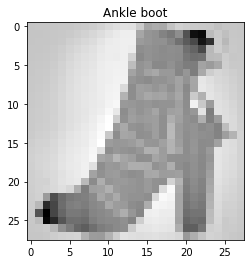

In [15]:
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bad", "Ankle boot"]
plt.imshow(np.reshape(images[11], (28, 28)), cmap="binary") #On precise avec "binary" que nous somme sur une image en noir et blanc
plt.title(targets_names[targets[11]])
plt.show()

In [16]:
#print(images[10][0]) #Affiche première ligne de l'image 10
#print(targets_names[targets[10]]) #Type de cette image

In [17]:
#On veut creer un reseau de neurone avec 784 input
print("Taille pixel image : ", images[0].size)
#On veut 2 layers dont la premiere a 256 neurones et la deuxieme 128
#Notre output layer aura 10 neurones car 10 types de classification
print("\nNombre de classificiation : ", len(targets_names))

Taille pixel image :  784

Nombre de classificiation :  10


In [18]:
#Comment formater les données en input
#model = tf.keras.models.Sequential() #On creer un model sequentiel
#model.add(tf.keras.layers.Flatten(input_shape=[28, 28])) #On flatten notre image 28 par 28
#print("Shape avant flatten : ", images[0:1].shape) #On voit ici qu'elle est en 2D
#model_output = model.predict(images[0:1])
#print("Shape après flatten : ", model_output.shape) #On voit ici qu'elle a bien été flatten

# --> Les fonctions d'activation

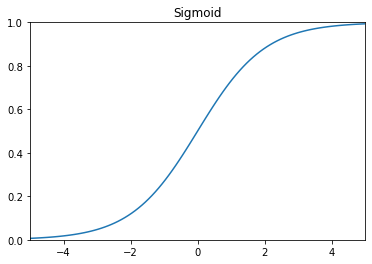

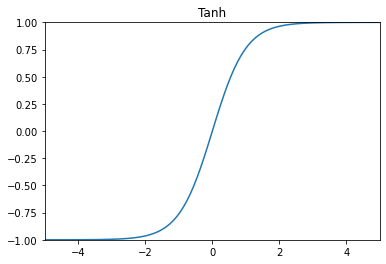

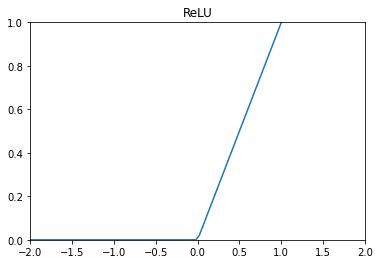

In [19]:
#La valeur de pre-activation (somme ponderee de la couche precedente) peut aller de -inf a +inf.
#Il faut que l'on gere cette valeur, en utilisant une fonction d'activation.

#Sigmoid
#La sortie est plus cohérente car resultat entre 0 et 1.
#Si on a plusieurs neurones sur la couche de sortie il ne faut pas
#utiliser sigmoid car la distribution de probabilite ne serait
#pas egale a 1, il faudrait donc utiliser une autre fonction
#d'activation comme softmax. Un des problemes de cette fonction
#d'activation est le fait que le gradient diminue trop rapidemment
#ce qui fait qu'il disparait... Tanh permet d'aider sur ce point.
x = np.linspace(-5, 5, 100)
y = 1/(1 + np.exp(-x))
plt.figure()
plt.xlim(-5,5)
plt.ylim(0, 1)
plt.plot(x, y)
plt.title("Sigmoid")
plt.show()

#Softmax
#Softmax prends pour son operation toutes les valeurs de pre activation
#de la couche d'avant et fait en sorte que la somme des activations sur
#la couche output soit egale a 1.

#Tanh
#Tanh permet de mettre une range sur les sorties, par exemple [0,360]
#Cela peut etre tres pratique dans certain cas. L'avantage est surtout
#present lors de la descente de gradient car on pourrait traduire la sortie
#pour arriver dans une certaine range. Le gradient diminue bien plus
#lentement que lors de l'utilisation de sigmoid.
x = np.linspace(-5, 5, 100)
y = (1 - np.exp(-2*x))/(1 + np.exp(-2*x)) #peut etre remplace par np.tanh()
plt.figure()
plt.xlim(-5,5)
plt.ylim(-1, 1)
plt.plot(x, y)
plt.title("Tanh")
plt.show()

#ReLU
#ReLU mets a 0 les valeurs negatives et copie les valeurs positives
#Lorsque les valeurs sont copie elles sont donc "activees" par la fonction.
#ReLU est utilise sur les hidden layers. En effet, a moins que le probleme
#soit lineaire, on utilise ReLU, sigmoid, tanh... 
x = np.linspace(-2, 2, 100)
y = np.maximum(0, x)
plt.figure()
plt.xlim(-2,2)
plt.ylim(0, 1)
plt.plot(x, y)
plt.title("ReLU")
plt.show()

# --> Ajout des layers

In [20]:
#Notre model sera de type sequentiel
model = tf.keras.models.Sequential() #Chaque neurones d'une couche C est connecte a chaque neurones de la couche C-1
#Ajout des layers
model.add(tf.keras.layers.Dense(256, activation="relu")) #256 neurones, fonction activation ReLU
model.add(tf.keras.layers.Dense(128, activation="relu")) #128 neurones, fonction activation ReLU
#10 neurones output car 10 types de classification, activation softmax pour distribution normal probabiliste
model.add(tf.keras.layers.Dense(10, activation="softmax")) 

In [21]:
#Tentative de prediction
model_output = model.predict(images[3:4])
print("Prediction du type de l'image :\n", model_output) 
print("\nType de l'image", targets[3:4])

Prediction du type de l'image :
 [[0.07397866 0.14423448 0.0328366  0.21037646 0.08665006 0.06472352
  0.07291181 0.09559052 0.15879239 0.05990544]]

Type de l'image [3]


In [22]:
#On peut afficher un resume du model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


# --> Qu'est ce que la categorical crossentropy ?

In [23]:
images_test = images[:5]                     #On ne prends que les 5 premieres images pour notre test
labels_test = targets[:5]
print("Images shape : ", images_test.shape)  #Affichage de la shape de nos images et targets
print("Targets shape : ", labels_test.shape)
outputs_test = model.predict(images_test)    #Tentative de prediction du model non entrainé pour les 5 premieres images
print("Output shape : ", outputs_test.shape) #Affichage de la shape de ce resultat
print("Output :\n", outputs_test)             #et du resultat

#Ici la shape de l'output est (5,10) donc nous avons pour chacune des 5 images
#10 valeurs qui sont les probabilites que l'image soit classifiee pour chacun des labels
#La categorical crossentropy filtre ces 10 valeurs pour ne garder que celle qui correspond
#a la "bonne reponse", celle qui devrait etre proche de 1 si le reseau est bien entraine
#Cette fonction de perte s'occupe donc seulement de cette valeur et cela ne pose pas de
#probleme car le softmax va creer une distribution de proportionalite sur la sortie.
#En effet, si on on modifie cette valeur en l'augmentant, cela faire diminuer les autres
#de par le softmax
filtered_outputs_test = outputs_test[np.arange(5), labels_test]
print("Output apres le filtre : ", filtered_outputs_test)

#Nous avons maintenant les probabilites qui devrait etre augmente pour chacune des images
#On applique alors np.log() 
#En effet des donnees mit au logarithme permet une meilleur convergence
#On sait qu'on utilise la descente de gradient pour pouvoir minimiser une erreur
#Quand on arrive a minimiser une erreur, on dit qu'on converge vers une solution
#Si on utilise le logarithme cela sera plus pratique pour effectuer la descente de gradient
#Le logarithme de change pas l'ordre croissant des valeurs car c'est une fonction
#qui est monotone croissante
log_filtered_outputs_test = np.log(filtered_outputs_test)
print("Output apres filtre et log : ", log_filtered_outputs_test)

#On veut minimiser une valeur qui est la moyenne de notre output
#On veut que cette valeur soit positive, on ajoute donc un "-" devant
print("Moyenne de cet output : ", - log_filtered_outputs_test.mean())

#Lors de la specification de la fonction de loss avec compile() on utilise "sparse_categorical_crossentropy"
#Le "sparse_" ici specifie que l'on peut utilise nos label comme etant [0, 1, 2, ..., 9]
#au lieu d'utiliser une representation "one hot encoding", qui pour nous donner la prediction "9"
#nous donnerait un vecteur one hot [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

#On choisit donc sparse_ si on a des labels specifique en entree
#on choisit categorical_crossentropy si nous avons un softmax sur l'output et plusieurs categories

Images shape :  (5, 784)
Targets shape :  (5,)
Output shape :  (5, 10)
Output :
 [[0.04268861 0.27613038 0.1448362  0.01090879 0.07621625 0.07207963
  0.02337671 0.11266372 0.18451937 0.05658034]
 [0.08856335 0.05417808 0.01598176 0.06843156 0.18083015 0.01207659
  0.03169644 0.06431441 0.41420725 0.06972044]
 [0.07082893 0.16128811 0.1237266  0.12924814 0.05708679 0.14985362
  0.05505461 0.07685959 0.07141047 0.10464317]
 [0.07397864 0.1442345  0.03283661 0.21037652 0.08665006 0.06472352
  0.07291181 0.09559051 0.15879235 0.05990545]
 [0.14126922 0.19813725 0.09146573 0.03273037 0.11882184 0.03684641
  0.01750597 0.13086657 0.1625329  0.06982386]]
Output apres le filtre :  [0.05658034 0.08856335 0.07082893 0.21037652 0.14126922]
Output apres filtre et log :  [-2.8720937 -2.4240372 -2.6474876 -1.5588564 -1.9570879]
Moyenne de cet output :  2.2919126


# --> Ajout de la fonction loss, optimizer, metrics

In [24]:
#Compilation du model
model.compile(
    loss="sparse_categorical_crossentropy",  #Fonction de perte
    optimizer="sgd",                         #Optimisation stochastic gradient descent
    metrics=["accuracy"]                     #Accuracy est la metrique que l'on veut utiliser
)

# --> Entrainement du model

In [25]:
#Entrainement du model
#On passe 10 fois sur l'entierete du datasat
#On prends 20% pour le validation set
history = model.fit(images_train, targets_train, epochs=10, validation_split=0.2) 

Epoch 1/10
200/200 [==============================] - 1s 2ms/step - loss: 1.3129 - accuracy: 0.5738 - val_loss: 0.6573 - val_accuracy: 0.7694
Epoch 2/10
200/200 [==============================] - 0s 932us/step - loss: 0.5750 - accuracy: 0.8023 - val_loss: 0.5557 - val_accuracy: 0.7944
Epoch 3/10
200/200 [==============================] - 0s 987us/step - loss: 0.4782 - accuracy: 0.8379 - val_loss: 0.5131 - val_accuracy: 0.8037
Epoch 4/10
200/200 [==============================] - 0s 1ms/step - loss: 0.4122 - accuracy: 0.8605 - val_loss: 0.4893 - val_accuracy: 0.8200
Epoch 5/10
200/200 [==============================] - 0s 1ms/step - loss: 0.3816 - accuracy: 0.8742 - val_loss: 0.4766 - val_accuracy: 0.8188
Epoch 6/10
200/200 [==============================] - 0s 982us/step - loss: 0.3519 - accuracy: 0.8778 - val_loss: 0.4700 - val_accuracy: 0.8219
Epoch 7/10
200/200 [==============================] - 0s 957us/step - loss: 0.3193 - accuracy: 0.8909 - val_loss: 0.4615 - val_accuracy: 0.825

# --> Affichage des courbes après entrainement

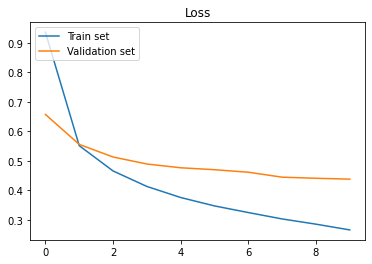

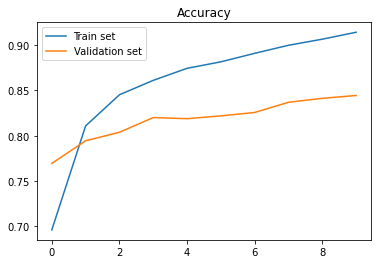

In [26]:
#Affichage des resultats finaux

#Train set data
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]
#Validation set data
val_loss_curve = history.history["val_loss"]
val_acc_curve = history.history["val_accuracy"]

#Loss plot
plt.plot(loss_curve, label="Train set")
plt.plot(val_loss_curve, label="Validation set")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

#Accuracy plot
plt.plot(acc_curve, label="Train set")
plt.plot(val_acc_curve, label="Validation set")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

# --> Sauveguarder son model

In [10]:
model.save("ImageClassification/first_nn.h5") #Sauveguarder le model first_nn.h5 pour le reutiliser

In [11]:
loaded_model = tf.keras.models.load_model("ImageClassification/first_nn.h5") #Charge le model
output = loaded_model.predict(images_test[0:1])
print("Prediction du saved model sur l'image 1 :\n", output)

Prediction du saved model sur l'image 1 :
 [[0.092177   0.03987991 0.07123321 0.13353588 0.299019   0.09005065
  0.03306269 0.10269777 0.09167709 0.04666683]]
